In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy.signal import gaussian
from math import log10, sqrt 

In Next section there are some functions that are used for the filtering images

In [12]:
def convolution(f, w, kernel_size):
    w=w[::-1,::-1]
    Filtered_Image = np.zeros(np.shape(f))
    f = np.pad(f,1)
    for i in range(f.shape[0]-kernel_size+1):
        for j in range(f.shape[1]-kernel_size+1):
            Filtered_Image[i, j] = np.sum(f[i:i+kernel_size, j:j+kernel_size] * w)
    return Filtered_Image

def img_filter(img, kernel_size=3):
    img1=img.copy()
    filter_matrix = np.ones((kernel_size,kernel_size))/kernel_size**2 
    Filtered_Image = convolution(img1, filter_matrix, kernel_size)
    return Filtered_Image

def PSNR(original, Filtered): 
    mse = np.mean((original - Filtered) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

def wiener_filter(img, kernel = 1):
    if type(kernel)==int:
        kernel=np.zeros((5,5))
        kernel[3,3]=1
    PNN=np.var(img[0:50,0:50])
    FF = np.copy(img)
    FF = np.fft.fft2(FF)
    kernel = np.fft.fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + PNN )
    FF = FF * kernel
    FF = np.abs(np.fft.ifft2(FF))
    return FF

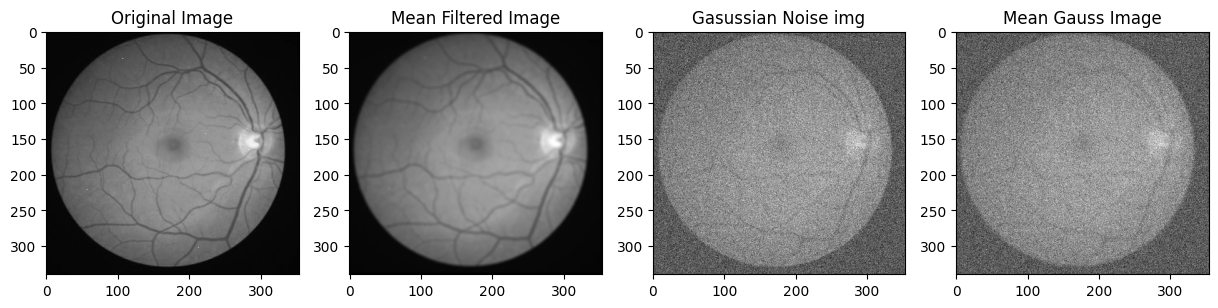

In [10]:
Retina_img=cv.imread('retina.png',0)
kernel_size=5
Mean_filtered_img=img_filter(Retina_img,kernel_size)
noise = np.random.normal(loc=0, scale=50, size=Retina_img.shape)
GaussianNoisy_img = Retina_img + noise
Mean_Gauss_img=Mean_filtered_img+noise

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(Retina_img,cmap='gray')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(Mean_filtered_img,cmap='gray')
plt.title('Mean Filtered Image')
plt.subplot(1,4,3)
plt.imshow(GaussianNoisy_img,cmap='gray')
plt.title('Gasussian Noise img')
plt.subplot(1,4,4)
plt.imshow(Mean_Gauss_img,cmap='gray')
plt.title('Mean Gauss Image')
plt.show()

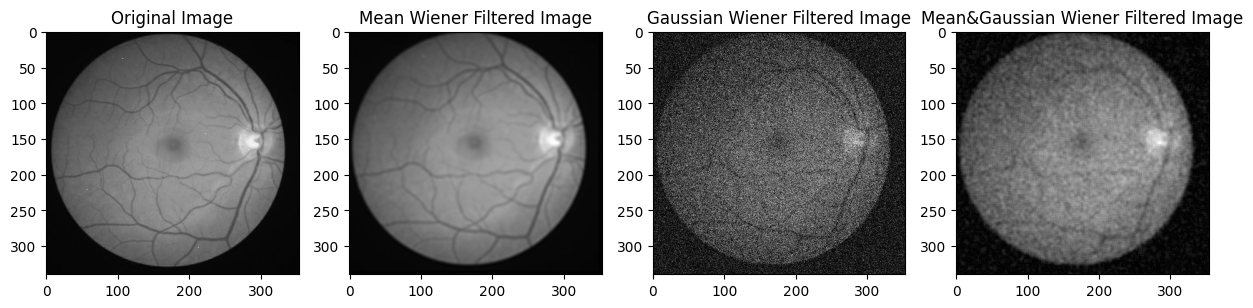

In [13]:
kernel = np.ones((kernel_size,kernel_size))/kernel_size**2 


Mean_Wiener_Filtered=wiener_filter(Mean_filtered_img,kernel)

Gaussian_Wiener_Filtered=wiener_filter(GaussianNoisy_img)

MeanGauss_Wiener_Filtered=wiener_filter(Mean_Gauss_img,kernel)


plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(Retina_img,cmap='gray')
plt.title("Original Image")
plt.subplot(1,4,2)
plt.imshow(Mean_Wiener_Filtered,cmap='gray')
plt.title("Mean Wiener Filtered Image")
plt.subplot(1,4,3)
plt.imshow(Gaussian_Wiener_Filtered,cmap='gray')
plt.title("Gaussian Wiener Filtered Image")
plt.subplot(1,4,4)
plt.imshow(MeanGauss_Wiener_Filtered,cmap='gray')
plt.title("Mean&Gaussian Wiener Filtered Image")
plt.show()

In [8]:
psnr_mean = PSNR(Retina_img, Mean_Wiener_Filtered)
psnr_gaussian = PSNR(Retina_img, Gaussian_Wiener_Filtered)
psnr_mean_gauss = PSNR(Retina_img, MeanGauss_Wiener_Filtered)

print("PSNR between original and Mean Wiener filtered image:", psnr_mean)
print("PSNR between original and Gaussian Wiener filtered image:", psnr_gaussian)
print("PSNR between original and Mean Gaussian Wiener filtered image:", psnr_mean_gauss)

PSNR between original and Mean Wiener filtered image: 20.244435371475305
PSNR between original and Gaussian Wiener filtered image: 8.168250403954486
PSNR between original and Mean Gaussian Wiener filtered image: 8.168200481893173
